In [1]:
from ttim import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T = 500  # transmissivity
S = 1e-4
t = np.logspace(-2, 2, 101)
r = 20
Q = 1000

### Regular Theis well

In [3]:
ml = ModelMaq(kaq=25, z=[20, 0], Saq=S/20, tmin=0.01, tmax=100)
w = DischargeWell(ml, tsandQ=[(0, Q)], rw=1e-5)
ml.solve()
h1 = ml.head(r, 0, t)

self.neq  0
No unknowns. Solution complete


### Hantush for several different $c$ values

In [4]:
clist = [1e2, 1e3, 1e4]
hhantush = np.zeros((len(clist), len(t)))
for i, c in enumerate(clist):
    ml = ModelMaq(kaq=25, z=[21, 20, 0], c=c, Saq=S/20, topboundary='semi', tmin=0.01, tmax=100)
    w = DischargeWell(ml, tsandQ=[(0, Q)], rw=1e-5)
    ml.solve()
    hhantush[i] = ml.head(r, 0, t)[0]

self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete


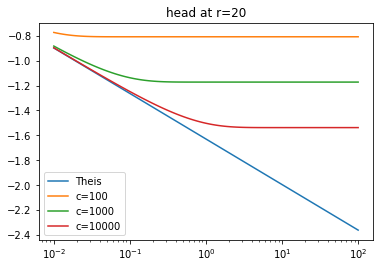

In [5]:
plt.semilogx(t, h1[0], label='Theis')
for i in range(3):
    plt.semilogx(t, hhantush[i], label='c=' + str(int(clist[i])))
plt.legend(loc='best')
plt.title('head at r=20');

### Two-aquifer system with same $T$ in both layers and several different $c$ values

In [6]:
clist = [1e2, 1e3, 1e4]
htwolayer = np.zeros((len(clist), len(t)))
for i, c in enumerate(clist):
    ml = ModelMaq(kaq=[25, 25], z=[20, 0, -5, -25], c=c, Saq=S/20, topboundary='conf', tmin=0.01, tmax=100)
    w = DischargeWell(ml, tsandQ=[(0, Q)], rw=1e-5)
    ml.solve()
    htwolayer[i] = ml.head(r, 0, t)[0]

self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete
self.neq  0
No unknowns. Solution complete


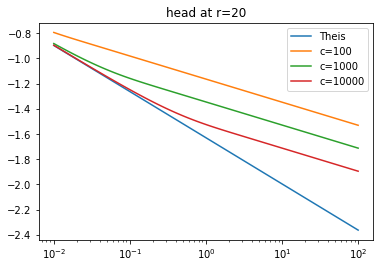

In [7]:
plt.semilogx(t, h1[0], label='Theis')
for i in range(3):
    plt.semilogx(t, htwolayer[i], label='c=' + str(int(clist[i])))
plt.legend(loc='best')
plt.title('head at r=20');

### Model that starts at $t=10$ days

In [8]:
ml = ModelMaq(kaq=25, z=[20, 0], Saq=S/20, tmin=0.01, tmax=100, tstart=10)
w = DischargeWell(ml, tsandQ=[(10, Q)], rw=1e-5)
ml.solve()
ht10 = ml.head(r, 0, t)

self.neq  0
No unknowns. Solution complete
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted


Text(0.5,1,'note that heads are not computed at the same times')

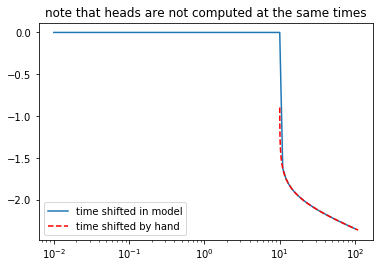

In [9]:
plt.semilogx(t, ht10[0], label='time shifted in model')
plt.semilogx(t + 10, h1[0], 'r--', label='time shifted by hand')
plt.legend(loc='best')
plt.title('note that heads are not computed at the same times')